<a href="https://colab.research.google.com/github/ItsMJ20/ObjectDetection_Project_YOLO4/blob/main/ObjectDetection_Project_YOLO4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the model YOLO$ for object detection. You shoild uplaod an image as a part of the code.

Make sure you have the yolov4.cfg, yolov4.weights, and coco.names files in the current working directory. 


In [6]:
import os

if os.path.exists("coco.names"):
    print("yolov4.weights is in the current directory.")
else:
    print("yolov4.weights not found.")


yolov4.weights is in the current directory.


Please upload your image.


Saving photo.jpg to photo (2).jpg


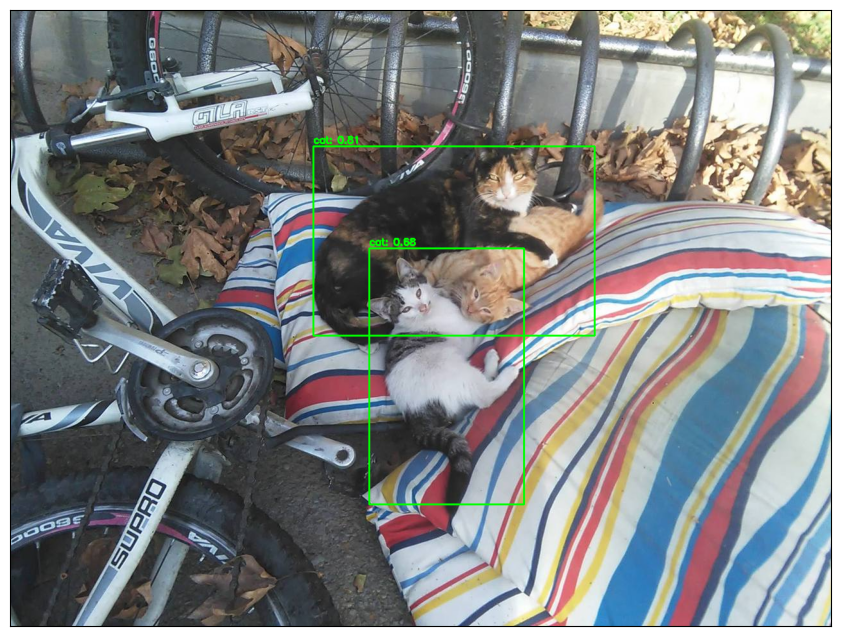

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Load YOLOv4 config and weights
net = cv2.dnn.readNet("yolov4.cfg", "yolov4.weights")

# Load COCO class labels
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Ask for input image and load it
print("Please upload your image.")
uploaded = files.upload()
input_image_name = list(uploaded.keys())[0]
img = cv2.imread(input_image_name)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Prepare input image for YOLOv4
blob = cv2.dnn.blobFromImage(img, 1/255.0, (608, 608), swapRB=True, crop=False)

# Set input image for YOLOv4 network
net.setInput(blob)

# Run forward pass of YOLOv4 network
outs = net.forward(net.getUnconnectedOutLayersNames())

# Process YOLOv4 output
class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:
            center_x = int(detection[0] * img.shape[1])
            center_y = int(detection[1] * img.shape[0])
            w = int(detection[2] * img.shape[1])
            h = int(detection[3] * img.shape[0])
            x = int(center_x - w/2)
            y = int(center_y - h/2)

            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

# ...

# Perform non-maximum suppression to remove overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Draw final boxes on image
if len(indices) > 0:
    for i in indices.flatten():
        box = boxes[i]
        x, y, w, h = box
        label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
        color = (0, 255, 0)
        cv2.rectangle(img_rgb, (x, y), (x+w, y+h), color, 2)
        cv2.putText(img_rgb, label, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
else:
    print("No objects detected in the image.")

# Display result image
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

